In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tregs

In [2]:
def plot_footprint(footprint, region_params, smoothed=True,
                   left_x_lim=-115, right_x_lim=45,
                   reverse_colors=False,
                   fpath=None, title_text=''):
    fig, ax = plt.subplots(figsize=(10, 2.9))

    ax.set_xlim(left_x_lim, right_x_lim)

    max_signal = max(abs(footprint))

    ax.set_ylim(top=max_signal*1.15)

    # Adding the text to the top-left corner of the plot within plot boundaries
    if title_text:
        ax.text(left_x_lim + 3, max_signal * 1.05, title_text, 
                fontsize=14, verticalalignment='top', horizontalalignment='left')

    for region in region_params:
        if len(region)==4:
            tregs.footprint.label_binding_site(ax, region[0], region[1], max_signal, region[2], region[3])
        else:
            tregs.footprint.label_binding_site(ax, region[0], region[1], max_signal, region[2], region[3],
                            lifted=region[4])
    windowsize = 3
    if smoothed:
        cut = int((windowsize - 1) / 2)
        x = np.arange(left_x_lim + cut, right_x_lim - cut)
    else:
        x = np.arange(left_x_lim, right_x_lim)
    
    if not reverse_colors:
        shiftcolors = ['#D56C55' if fp < 0 else '#738FC1' for fp in footprint]
    else:
        shiftcolors = [('#D56C55' if fp > 0 else '#738FC1') for fp in footprint]
    ax.bar(x, abs(footprint), color=shiftcolors, edgecolor=None, linewidth=0)
    ax.set_ylabel('Information (bits)', fontsize=16)
    ax.set_xlabel('Position relative to TSS', fontsize=16)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    plt.tight_layout()
    if fpath is not None:
        plt.savefig(fpath, dpi=300)
    plt.show()

In [3]:
# Load the Excel file
file_path_rapA = '/Users/rosalindpan/rpgroup/projects/theoretical_regseq/data/regseq_footprints/rapA.xlsx'
excel_data_rapA = pd.ExcelFile(file_path_rapA)

# Load the "Information_Footprints" sheet into a dataframe
info_footprint_rapA_df = pd.read_excel(file_path_rapA, sheet_name='Information_Footprints')

# Drop the first row that contains column headers
info_footprint_rapA_df = info_footprint_rapA_df.drop([0])

# Extract the 'rapA_heat_info' column (likely under 'Unnamed: 2')
footprint = info_footprint_rapA_df['Unnamed: 14']

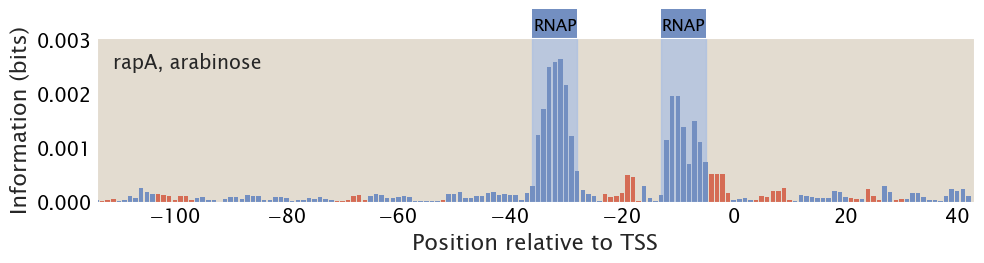

In [4]:
region_params = [(-36, -28, 'P', 'RNAP'), (-13, -5, 'P', 'RNAP')]
plot_footprint(footprint, region_params, smoothed=False,
               left_x_lim=-114, right_x_lim=43,
               reverse_colors=True,
               fpath='../plots/rapA_footprint.pdf',
               title_text='rapA, arabinose')

In [5]:
file_path = '/Users/rosalindpan/rpgroup/data/regseq/regseq_footprints/dicC_xanth2.txt'

fdhE_LB_df = pd.read_csv(file_path, delim_whitespace=True)
footprint = tregs.utils.smoothing(fdhE_LB_df['info'])

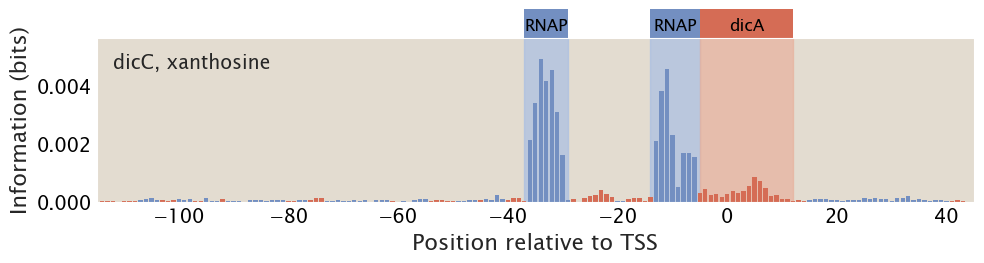

In [6]:
region_params = [(-37, -29, 'P', 'RNAP'), (-14, -5, 'P', 'RNAP'), (-5, 12, 'R', 'dicA')]
plot_footprint(footprint, region_params,
                fpath='../plots/dicC_footprint.pdf',
                title_text='dicC, xanthosine')

In [7]:
file_path = '/Users/rosalindpan/rpgroup/data/regseq/regseq_footprints/yehU_Anaero.txt'

df = pd.read_csv(file_path, delim_whitespace=True)
footprint = tregs.utils.smoothing(df['info'])

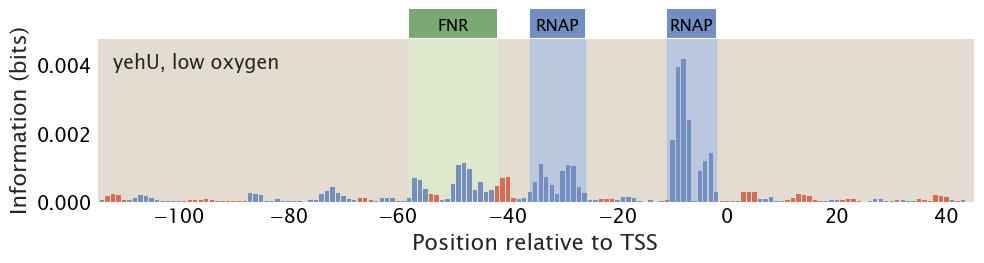

In [8]:
region_params = [(-36, -26, 'P', 'RNAP'), (-11, -2, 'P', 'RNAP'), (-58, -42, 'A', 'FNR')]
plot_footprint(footprint, region_params,
                fpath='../plots/yehU_footprint.pdf',
                title_text='yehU, low oxygen')

In [9]:
file_path = '/Users/rosalindpan/rpgroup/data/regseq/regseq_footprints/ykgE_Anaero.txt'

df = pd.read_csv(file_path, delim_whitespace=True)
footprint = tregs.utils.smoothing(df['info'])

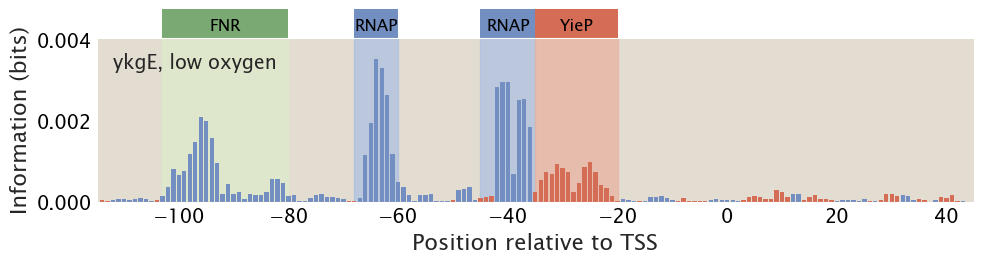

In [10]:
region_params = [(-68, -60, 'P', 'RNAP'), (-45, -35, 'P', 'RNAP'), (-103, -80, 'A', 'FNR'), (-35, -20, 'R', 'YieP')]
plot_footprint(footprint, region_params,
                fpath='../plots/ykgE_footprint.pdf',
                title_text='ykgE, low oxygen')

In [11]:
file_path = '/Users/rosalindpan/rpgroup/data/regseq/regseq_footprints/relM_9.txt'

df = pd.read_csv(file_path, delim_whitespace=True)
footprint = tregs.utils.smoothing(df['info'])

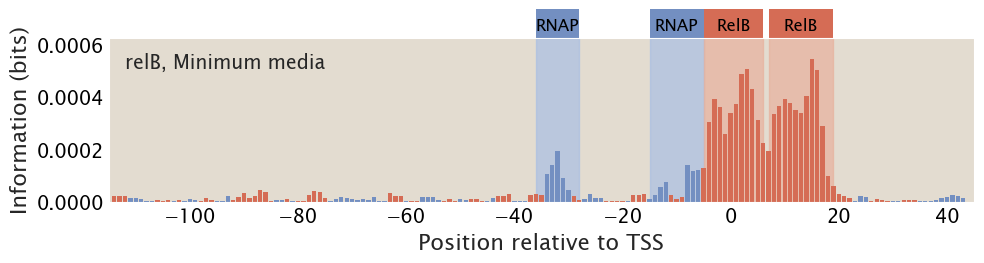

In [12]:
region_params = [(-36, -28, 'P', 'RNAP'), (-15, -5, 'P', 'RNAP'), (-5, 6, 'R', 'RelB'), (7, 19, 'R', 'RelB')]
plot_footprint(footprint, region_params,
                fpath='../plots/relM_footprint.pdf',
                title_text='relB, Minimum media')

In [13]:
file_path = '/Users/rosalindpan/rpgroup/data/regseq/regseq_footprints/araA_Bxylara.txt'

df = pd.read_csv(file_path, delim_whitespace=True)
footprint = tregs.utils.smoothing(df['info'])

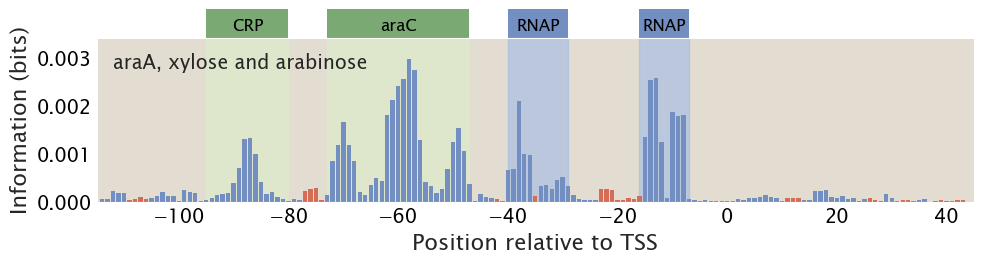

In [14]:
region_params = [(-40, -29, 'P', 'RNAP'), (-16, -7, 'P', 'RNAP'), (-95, -80, 'A', 'CRP'), (-73, -47, 'A', 'araC')]
plot_footprint(footprint, region_params,
                fpath='../plots/araA_footprint.pdf',
                title_text='araA, xylose and arabinose')